# Name : Pat O'Dowd

# Number : 8273375

### shapes.ipynb
Generation of geometric shapes including Kanizsa Triangles and Squareas

In [2]:
# import libraries
import math
import matplotlib.pyplot as plt
from PIL import Image,ImageDraw
import random


In [3]:
# Get random colours from a fixed pallette.
def getRandColor():
    black = (0,0,0)
    white = (255,255,255)
    gray = (100,100,100)
    colors = ['red','orange','yellow','green','blue','indigo','violet',black,white,gray]
    randnum = random.randint(0, 9)
    return colors[randnum]

In [4]:
# Rotate a point about an angle. Used to calclate the vertices of a triangle.
def rotate_point(angle,ox,oy,length1,length2):
    radians = math.radians(angle)/2

    x = 0
    y = length1
    px= x * math.cos(radians) - y * math.sin(radians)
    py= x * math.sin(radians) + y * math.cos(radians)
    y - length2
    qx= x * math.cos(-radians) - y * math.sin(-radians)
    qy= x * math.sin(-radians) + y * math.cos(-radians)
    px = px + ox
    py = py + oy
    qx = qx + ox
    qy = qy + oy

    return px,py,qx,qy


In [5]:
# Get triangle coordinates
def get_triangle_coords(length1,length2,angle,origin):
    ox,oy = origin

    rot_px,rot_py,rot_qx,rot_qy = rotate_point(angle,ox,oy,length1,length2)
    return rot_px,rot_py,rot_qx,rot_qy
    

In [6]:
# Get Rectangle coordinates
#def get_rectangle_coords(length1,length2,angle,origin):
#    ox,oy = origin

    

#    rot_px,rot_py,rot_qx,rot_qy = rotate_point(angle,ox,oy,length1,length2)
#    return rot_px,rot_py,rot_qx,rot_qy,rot_rx,rot_ry
    

In [7]:
# Draw pie slices - 'pacman' inducer shapes.
def draw_pieslices(ox,oy,px,py,qx,qy,angle,radius,im,fillcolor):
    draw = ImageDraw.Draw(im)
    startx = ox - radius
    starty = oy - radius
    endx = ox + radius
    endy = oy + radius
        
    draw.pieslice([(startx,starty),(endx,endy)],-240,60,(100,100,100),fill=fillcolor)

    return im
    

In [8]:
# Draw Kanizsa triangle
def draw_kanizsa_triangle(primary_angle,len1,len2,ox,oy,radius,rotation,noise,fillcolor):
    im = Image.new(mode = "RGB",size = (400,300),color = (255,255,255))

    px,py,qx,qy = get_triangle_coords(len1,len2,primary_angle,[ox,oy])
    draw = ImageDraw.Draw(im)
#    draw.polygon([(ox,oy),(px,py),(qx,qy),(ox,oy)],(200,200,200))
#    draw_pieslices(ox,oy,px,py,qx,qy,angle,rotation,im)
    
    draw = ImageDraw.Draw(im)
    startx = ox - radius
    starty = oy - radius
    endx = ox + radius
    endy = oy + radius
    start_angle = rotation +  primary_angle/2 + noise
    end_angle = rotation -  primary_angle/2 + noise

    draw.pieslice([(startx,starty),(endx,endy)],start_angle,end_angle,fillcolor)

    startx = px - radius
    starty = py - radius
    endx = px + radius
    endy = py + radius
    start_angle = rotation + 180 + primary_angle + primary_angle/2 + noise
    end_angle = rotation + 180 + primary_angle - primary_angle/2 + noise
    draw.pieslice([(startx,starty),(endx,endy)],start_angle,end_angle,fillcolor)

    startx = qx - radius
    starty = qy - radius
    endx = qx + radius
    endy = qy + radius
    start_angle = rotation + 180 - primary_angle + primary_angle/2  + noise
    end_angle = rotation + 180 - primary_angle - primary_angle/2  + noise
        
    draw.pieslice([(startx,starty),(endx,endy)],start_angle,end_angle,fillcolor)
    
    return im


In [9]:
# Draw regular triangle
def draw_triangle(primary_angle,len1,len2,ox,oy,scale,object_type,fillcolor,outlinecolor,lineWidth):
    im = Image.new(mode = "RGB",size = (400,300),color = (255,255,255))
    scale = scale / 100
    backgroundColor = (255,255,255)
    px,py,qx,qy = get_triangle_coords(len1,len2,primary_angle,[ox,oy])
    draw = ImageDraw.Draw(im)
#    draw_pieslices(ox,oy,px,py,qx,qy,angle,rotation,im)
    draw = ImageDraw.Draw(im)
    if object_type == "Outline":
        draw.polygon([(ox * scale,oy * scale),(px * scale,py * scale),(qx * scale,qy * scale)],width=lineWidth,fill=backgroundColor,outline=outlinecolor)
    else:
        draw.polygon([(ox * scale,oy * scale),(px * scale,py * scale),(qx * scale,qy * scale)],width=lineWidth,fill=fillcolor,outline=outlinecolor)

        
    
    return im


In [10]:
# Draw Kanizsa Square
def draw_kanizsa_square(primary_angle,len1,len2,ox,oy,radius,rotation,noise,fill_color):
    im = Image.new(mode = "RGB",size = (300,300),color = (255,255,255))


    px = ox 
    py = oy + len2

    qx = ox + len1
    qy = oy

    rx = ox + len1
    ry = oy + len2


    draw = ImageDraw.Draw(im)
#    draw.polygon([(ox,oy),(px,py),(qx,qy),(ox,oy)],(200,200,200))
#    draw_pieslices(ox,oy,px,py,qx,qy,angle,rotation,im)
    draw = ImageDraw.Draw(im)

    startx = px - radius
    starty = py - radius
    endx = px + radius
    endy = py + radius
    start_angle = rotation - 90 + primary_angle/2 - noise 
    end_angle = rotation - 90  - primary_angle/2 - noise 
    draw.pieslice([(startx,starty),(endx,endy)],start_angle,end_angle,fill_color)

    startx = ox - radius
    starty = oy - radius
    endx = ox + radius
    endy = oy + radius
    start_angle = rotation +  primary_angle/2 - noise
    end_angle = rotation -  primary_angle/2 - noise 
        
    draw.pieslice([(startx,starty),(endx,endy)],start_angle,end_angle,fill_color)


    startx = qx - radius
    starty = qy - radius
    endx = qx + radius
    endy = qy + radius
    start_angle = rotation + 90  + primary_angle/2 + noise 
    end_angle = rotation + 90 - primary_angle/2 + noise  
        
    draw.pieslice([(startx,starty),(endx,endy)],start_angle,end_angle,fill_color)

    startx = rx - radius
    starty = ry - radius
    endx = rx + radius
    endy = ry + radius
    start_angle = rotation + 180  + primary_angle/2 + noise 
    end_angle = rotation + 180 - primary_angle/2 + noise 
        
    draw.pieslice([(startx,starty),(endx,endy)],start_angle,end_angle,fill_color)

#    im = im.rotate(ri,expand=True)
    
    return im


In [16]:
# Draw Regular Square
def draw_square(len1,len2,ox,oy,scale,object_type,fillcolor,outlinecolor,lineWidth):
    backgroundColor = (255,255,255)


    im = Image.new(mode = "RGB",size = (300,300),color = backgroundColor)
    backgroundColor = getRandColor()
    scale = scale / 100
    px = ox 
    py = oy + len2

    qx = ox + len1
    qy = oy

    rx = ox + len1
    ry = oy + len2
    backgroundColor = (255,255,255)
    draw = ImageDraw.Draw(im)
#    outlinecolor = (1,1,1)
    if object_type == "Outline":
        draw.polygon([(ox * scale,oy * scale),(px * scale,py* scale),(rx* scale,ry* scale),(qx* scale,qy* scale)],fill=fillcolor,width=lineWidth,outline=outlinecolor)
    else:
        draw.polygon([(ox * scale,oy * scale),(px * scale,py* scale),(rx* scale,ry* scale),(qx* scale,qy* scale)],fill=fillcolor,width=lineWidth,outline=outlinecolor)
    
    return im


In [17]:
# Draw Regular Square
def draw_empty_square(len1,len2,ox,oy,scale,object_type,fillcolor,outlinecolor,lineWidth):
    backgroundColor = getRandColor()



    im = Image.new(mode = "RGB",size = (300,300),color = fillcolor)
    
    return im


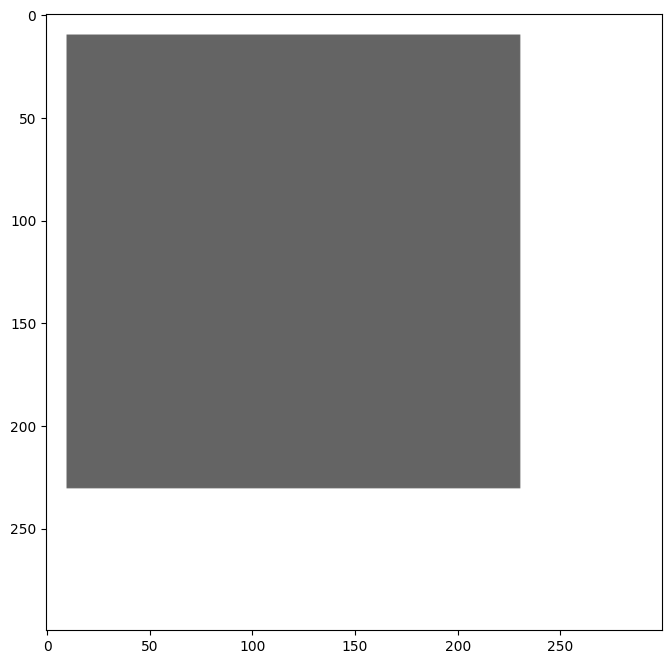

In [20]:
# Display Sample Square
import matplotlib.transforms as mtransforms
ox = 10
oy = 10
len1 = 220
len2 = 220
scale = 100
outlinecolor = (100,100,100)
fillcolor = getRandColor()
fillcolor = (100,100,100)
lineWidth = 1
object_type = 'Fill'
im=draw_square(len1,len2,ox,oy,scale,object_type,fillcolor,outlinecolor,lineWidth)
plt.figure(figsize=(8,8))

plt.imshow(im)


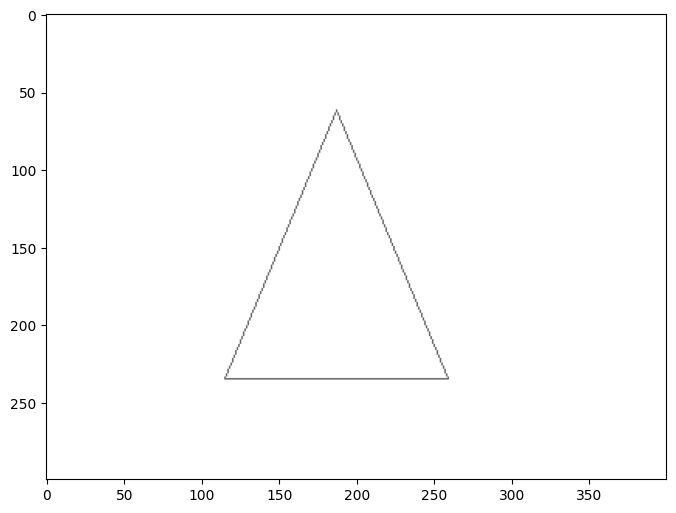

In [21]:
# Draw sample triangle
ox = 200
oy = 100
ox = 150
oy = 50

angle = 45
radius = 65
len1 = 150
len2 = 150
rotation =90
noise = 0
ri = 45
scale =125
outlinecolor = (100,100,100)
fillcolor = getRandColor()
fillcolor = (100,100,100)

im=draw_triangle(angle,len1,len2,ox,oy,scale,'Outline',fillcolor,outlinecolor,lineWidth)

plt.figure(figsize=(8,8))

plt.imshow(im)


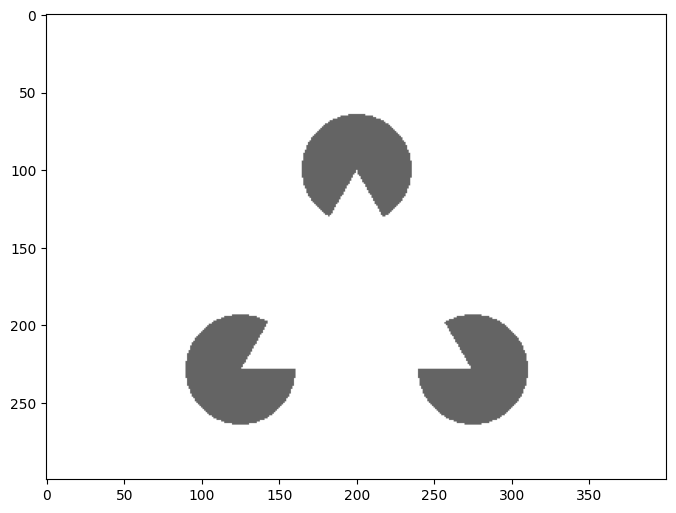

In [23]:
# Draw sample Kanizsa Triangle

num = 1
ox = 200
oy = 100
angle = 60
radius = 35
len1 = 150
len2 = 150
rotation = 90
noise = 0
ri = 0
gray = (100,100,100)

im=draw_kanizsa_triangle(angle,150,150,200,100,radius,90,0,gray)        


plt.figure(figsize=(8,8))

plt.imshow(im)


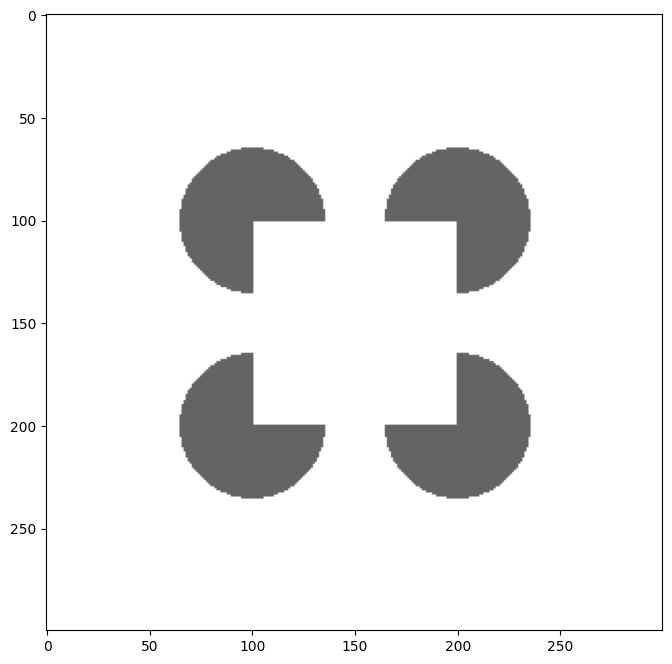

In [24]:
# Draw sample Kanizsa Square

num = 1
ox = 100
oy = 100
angle = 90
radius = 35
len1 = 100
len2 = 100
rotation = 45
noise = 0
ri = 0
gray = (100,100,100)
im=draw_kanizsa_square(angle,100,100,100,100,radius,45,0,gray)     

plt.figure(figsize=(8,8))

plt.imshow(im)


In [33]:
# Set rod directory for saving images.
root = "Content/"

In [34]:
# Generate filled Squares. Squares are scaled and rotated.
path = root + "Square/"

ri = 0
filenum = 1
object_type = 'Fill'
gray = (100,100,100)
for ri in range(0,90,2):
    for scale in range(50,140):
# Parameters for draw_square
# draw_square(xLength,yLength,xOrigin,yOrigin,scale,object_type(fill or outline),fillcolor,outlinecolor,lineWidth)
        im=draw_square(100,100,50,50,scale,'Fill',gray,gray,1)
        padded_num = str(filenum).rjust(6, '0')
        filename = path + "square_1_" + padded_num + ".png"
        im = im.rotate(ri,fillcolor=(255,255,255))
        im.save(filename,"PNG")
        filenum = filenum + 1
print(filenum)

4051


In [35]:
# Draw regular filled triangle shapes with scale, angle and rotation
path = root + "Triangle/"
ri = 0
gray = (100,100,100)
filenum = 1
for ri in range(0,90,5):
    for angle in range(40,90,5):
        for scale in range(50,125,3):
# draw_triangle param
# (angle,xLength,yLength,xOrigin,yOrigin,scale,object_type,fillcolor,outlinecolor,linewidth)
            im=draw_triangle(angle,150,150,150,50,scale,'Fill',gray,gray,1)
            padded_num = str(filenum).rjust(6, '0')
            filename = path + "triangle_1_" + padded_num + ".png"
            im = im.rotate(ri,fillcolor=(255,255,255))
            im.save(filename,"PNG")
            filenum = filenum + 1
print(filenum)

4501


In [36]:
# Generate coloured filled Squares. Squares are scaled and rotated.
path = root + "C_Square/"

ri = 0
filenum = 1
object_type = 'Fill'
gray = (100,100,100)
for ri in range(0,90,2):
    for scale in range(50,140):
# Parameters for draw_square
# draw_square(xLength,yLength,xOrigin,yOrigin,scale,object_type(fill or outline),fillcolor,outlinecolor,lineWidth)
        fillcolor = getRandColor()
        im=draw_square(100,100,50,50,scale,'Fill',fillcolor,gray,1)
        padded_num = str(filenum).rjust(6, '0')
        filename = path + "square_1_" + padded_num + ".png"
        im = im.rotate(ri,fillcolor=(255,255,255))
        im.save(filename,"PNG")
        filenum = filenum + 1
print(filenum)

4051


In [37]:
# Draw coloured filled triangle shapes with scale, angle and rotation
path = root + "C_Triangle/"
ri = 0
gray = (100,100,100)
filenum = 1
for ri in range(0,90,5):
    for angle in range(40,90,5):
        for scale in range(50,125,3):
# draw_triangle param
# (angle,xLength,yLength,xOrigin,yOrigin,scale,object_type,fillcolor,outlinecolor,linewidth)
            fillcolor = getRandColor()
            im=draw_triangle(angle,150,150,150,50,scale,'Fill',fillcolor,gray,1)
            padded_num = str(filenum).rjust(6, '0')
            filename = path + "triangle_1_" + padded_num + ".png"
            im = im.rotate(ri,fillcolor=(255,255,255))
            im.save(filename,"PNG")
            filenum = filenum + 1
print(filenum)

4501


In [38]:
# Generate outline Squares. Squares are scaled and rotated.

path = root + "O_Square/"
ri = 0
filenum = 1
gray = (100,100,100)
for ri in range(0,90,2):
    for scale in range(50,140):
# Parameters for draw_square
# draw_square(xLength,yLength,xOrigin,yOrigin,scale,object_type(fill or outline),fillcolor,outlinecolor,lineWidth)
        im=draw_square(100,100,50,50,scale,'Outline',gray,gray,3)
        padded_num = str(filenum).rjust(6, '0')
        filename = path + "square_1_" + padded_num + ".png"
        im = im.rotate(ri,fillcolor=(255,255,255))
        im.save(filename,"PNG")
        filenum = filenum + 1
print(filenum)

4051


In [39]:
# Generate thick outline Squares. Squares are scaled and rotated.

path = root + "OT_Square/"
ri = 0
filenum = 1
gray = (100,100,100)
for ri in range(0,90,2):
    for scale in range(50,140):
# Parameters for draw_square
# draw_square(xLength,yLength,xOrigin,yOrigin,scale,object_type(fill or outline),fillcolor,outlinecolor,lineWidth)
        im=draw_square(100,100,50,50,scale,'Outline',gray,gray,10)
        padded_num = str(filenum).rjust(6, '0')
        filename = path + "square_1_" + padded_num + ".png"
        im = im.rotate(ri,fillcolor=(255,255,255))
        im.save(filename,"PNG")
        filenum = filenum + 1
print(filenum)

4051


In [40]:
# Draw regular outline triangle shapes with scale, angle and rotation

path = root + "O_Triangle/"

filenum = 1
gray = (100,100,100)
for ri in range(0,90,5):
    for angle in range(40,90,5):
        for scale in range(50,125,3):
            im=draw_triangle(angle,150,150,150,50,scale,'Outline',gray,gray,3)
            padded_num = str(filenum).rjust(6, '0')
            filename = path + "triangle_1_" + padded_num + ".png"
            im = im.rotate(ri,fillcolor=(255,255,255))
            im.save(filename,"PNG")
            filenum = filenum + 1
print(filenum)

4501


In [41]:
# Draw regular thick outline triangle shapes with scale, angle and rotation

path = root + "OT_Triangle/"

filenum = 1
gray = (100,100,100)
for ri in range(0,90,5):
    for angle in range(40,90,5):
        for scale in range(50,125,3):
            im=draw_triangle(angle,150,150,150,50,scale,'Outline',gray,gray,10)
            padded_num = str(filenum).rjust(6, '0')
            filename = path + "triangle_1_" + padded_num + ".png"
            im = im.rotate(ri,fillcolor=(255,255,255))
            im.save(filename,"PNG")
            filenum = filenum + 1
print(filenum)

4501


In [42]:
# Draw Kanizsa Squares
path = root + "K_Square/"
filenum = 1
gray = (100,100,100)
for ri in range(0,90,5):
    for angle in range(80,95):
        for radius in range(25,40):
            im=draw_kanizsa_square(angle,100,100,100,100,radius,45,0,gray)     
            padded_num = str(filenum).rjust(6, '0')
            filename = path + "square_1_" + padded_num + ".png"
            im = im.rotate(ri,fillcolor=(255,255,255))
            im.save(filename,"PNG")
            filenum = filenum + 1
print(filenum)

4051


In [44]:
# Draw Kanizsa Triangles
path = root + "K_Triangle/"


filenum = 1
gray = (100,100,100)
for ri in range(0,90,5):
    rotate_angle = 0
    for angle in range(55,65):
        for radius in range(35,60):
            im=draw_kanizsa_triangle(angle,150,150,200,100,radius,90,0,gray)        
            padded_num = str(filenum).rjust(6, '0')
            filename = path + "triangle_1_" + padded_num + ".png"
            im = im.rotate(ri,fillcolor=(255,255,255))
            im.save(filename,"PNG")
            filenum = filenum + 1
print(filenum)

4501


In [45]:
# Draw image with 3 unaligned Kanizsa inducers so that illusory image not created
path = root + "NK_Triangle/"
filenum = 1
gray = (100,100,100)
for ri in range(0,90,5):
    for angle in range(55,65):
        for radius in range(35,60):
            im=draw_kanizsa_triangle(angle,150,150,200,100,radius,0,0,gray)        
            padded_num = str(filenum).rjust(6, '0')
            filename = path + "triangle_0_" + padded_num + ".png"
            im = im.rotate(ri,fillcolor=(255,255,255))
            im.save(filename,"PNG")
            filenum = filenum + 1
print(filenum)

4501


In [46]:
# Draw image with 4 unaligned Kanizsa inducers so that illusory image not created
path = root + "NK_Square/"

for ri in range(0,90,5):
    for angle in range(80,95):
        for radius in range(25,40):
            im=draw_kanizsa_square(angle,100,100,100,100,radius,90,0,0)     
            padded_num = str(filenum).rjust(6, '0')
            filename = path + "square_0_" + padded_num + ".png"
            im = im.rotate(ri,fillcolor=(255,255,255))
            im.save(filename,"PNG")
            filenum = filenum + 1
print(filenum)

8551


In [47]:
# Draw Coloured Kanizsa Squares
path = root + "KC_Square/"
filenum = 1
gray = (100,100,100)
for ri in range(0,90,5):
    for angle in range(80,95):
        for radius in range(25,40):
            fillcolor = getRandColor()
            im=draw_kanizsa_square(angle,100,100,100,100,radius,45,0,fillcolor)     
            padded_num = str(filenum).rjust(6, '0')
            filename = path + "square_1_" + padded_num + ".png"
            im = im.rotate(ri,fillcolor=(255,255,255))
            im.save(filename,"PNG")
            filenum = filenum + 1
print(filenum)

4051


In [48]:
# Draw coloured Kanizsa triangles
path = root + "KC_Triangle/"


filenum = 1
gray = (100,100,100)
for ri in range(0,90,5):
    rotate_angle = 0
    for angle in range(55,65):
        for radius in range(35,60):
            fillcolor = getRandColor()
            im=draw_kanizsa_triangle(angle,150,150,200,100,radius,90,0,fillcolor)        
            padded_num = str(filenum).rjust(6, '0')
            filename = path + "triangle_1_" + padded_num + ".png"
            im = im.rotate(ri,fillcolor=(255,255,255))
            im.save(filename,"PNG")
            filenum = filenum + 1
print(filenum)

4501


In [68]:
# Generate set of blank coloured images
root = "Noise/"
path = root + "Noise_Sq/"
black = (0,0,0)
white = (255,255,255)
gray = (100,100,100)
colors = ['red','orange','yellow','green','blue','indigo','violet',black,white,gray]
ri = 0
filenum = 1
object_type = 'Fill'
for i in range(0,20):
    for colorindex in range(0,10):
# Parameters for draw_square
# draw_square(xLength,yLength,xOrigin,yOrigin,scale,object_type(fill or outline),fillcolor,outlinecolor,lineWidth)
        im=draw_empty_square(10,10,220,220,1,'Fill',colors[colorindex],gray,1)
        padded_num = str(filenum).rjust(6, '0')
        filename = path + "square_1_" + padded_num + ".png"
#        im = im.rotate(ri,fillcolor=(255,255,255))
        im.save(filename,"PNG")
        filenum = filenum + 1
print(filenum)

201


In [69]:
# Generate set of blank coloured images. Identical to above but labelled triangles!
root = "Noise/"
path = root + "Noise_T/"
black = (0,0,0)
white = (255,255,255)
gray = (100,100,100)
colors = ['red','orange','yellow','green','blue','indigo','violet',black,white,gray]
ri = 0
filenum = 1
object_type = 'Fill'
for i in range(0,20):
    for colorindex in range(0,10):
# Parameters for draw_square
# draw_square(xLength,yLength,xOrigin,yOrigin,scale,object_type(fill or outline),fillcolor,outlinecolor,lineWidth)
        im=draw_empty_square(10,10,220,220,1,'Fill',colors[colorindex],gray,1)
        padded_num = str(filenum).rjust(6, '0')
        filename = path + "square_1_" + padded_num + ".png"
#        im = im.rotate(ri,fillcolor=(255,255,255))
        im.save(filename,"PNG")
        filenum = filenum + 1
print(filenum)

201
